In [44]:
from data import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree

In [45]:
df = read_data() # 'tx_crash.csv' the new feature does not seem useful, acc=0.815

df_X = df.drop(columns=['tot_crash_count', 'crash'])
df_y = df['crash']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# cross_val_score(rf, X_train, y_train, cv=3)
# cv_results = cross_validate(rf, X_train, y_train, cv=3, n_jobs=-1)

# rf = RandomForestClassifier()
# n_estimators = [100, 200, 500, 1000] # 100: 0.815
# rf_grid = {'n_estimators': n_estimators}
# clf = GridSearchCV(estimator=rf, param_grid=rf_grid, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# y_val_pred = rf.predict(X_val)
print(rf.score(X_train, y_train))
print(rf.score(X_val, y_val))
print(rf.score(X_test, y_test))

importances = rf.feature_importances_
indices = np.argsort(importances)
features = list(X_train.columns)

# rf.get_params()

0.9999825412898495
0.8160251374705421
0.8157522624434389


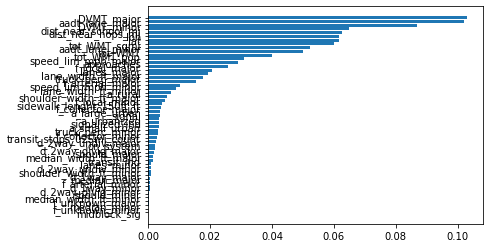

In [47]:
import matplotlib.pyplot as plt
plt.barh(range(len(indices)), importances[indices]);
plt.yticks(range(len(indices)), [features[i] for i in indices]);

# export_graphviz(rf,
#                 feature_names=features,
#                 filled=True,
#                 rounded=True)

# tree.plot_tree(rf.estimators_[0],
#                feature_names = features,
#                filled = True)